In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
import numpy as np

In [3]:
df1= pd.read_csv(r"C:\Users\dorice asami\OneDrive\Desktop\machine_learning1\week1_project\chip_dataset (1).csv")

### 1. Explore the missingness in the dataset for categorical and numerical data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [ ]:


num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df1.select_dtypes(include=['object', 'category']).columns


print("Numerical_columns", num_cols)
print("categorical columns", cat_cols)

Numerical_columns Index(['Unnamed: 0', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)',
       'Transistors (million)', 'Freq (MHz)', 'FP16 GFLOPS', 'FP32 GFLOPS',
       'FP64 GFLOPS'],
      dtype='object')
categorical columns Index(['Product', 'Type', 'Release Date', 'Foundry', 'Vendor'], dtype='object')


In [ ]:
# count missing values
df1[num_cols].isnull().sum()

df1[num_cols].isnull().mean()* 100

Unnamed: 0                0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64

In [15]:
#missingness in categorical columns
df1[cat_cols].isnull().sum()

Product         0
Type            0
Release Date    0
Foundry         0
Vendor          0
dtype: int64

In [42]:
#Rows with missing values
missing_rows = df1[df1.isnull().any(axis=1)]
print(missing_rows)


                        Product Type Release Date  Process Size (nm)  TDP (W)  \
68         Intel Core i7-9850HE  CPU          NaT               14.0     45.0   
1558       Intel Core i7-9850HL  CPU          NaT               14.0     25.0   
2026      Intel Core i9-10990XE  CPU          NaT               14.0    380.0   
2221     NVIDIA Jetson Nano GPU  GPU          NaT               20.0     10.0   
2237          3dfx Spectre 1000  GPU          NaT              180.0     30.0   
...                         ...  ...          ...                ...      ...   
4737           Intel Xe DG1 OEM  GPU          NaT               10.0     30.0   
4798  NVIDIA Quadro T400 Mobile  GPU          NaT               12.0     18.0   
4810      AMD Radeon Pro V7300X  GPU          NaT               14.0    130.0   
4820         AMD FirePro W4130M  GPU          NaT               28.0     49.4   
4833        AMD Radeon R9 280X2  GPU          NaT               28.0    375.0   

      Die Size (mm^2)  Tran

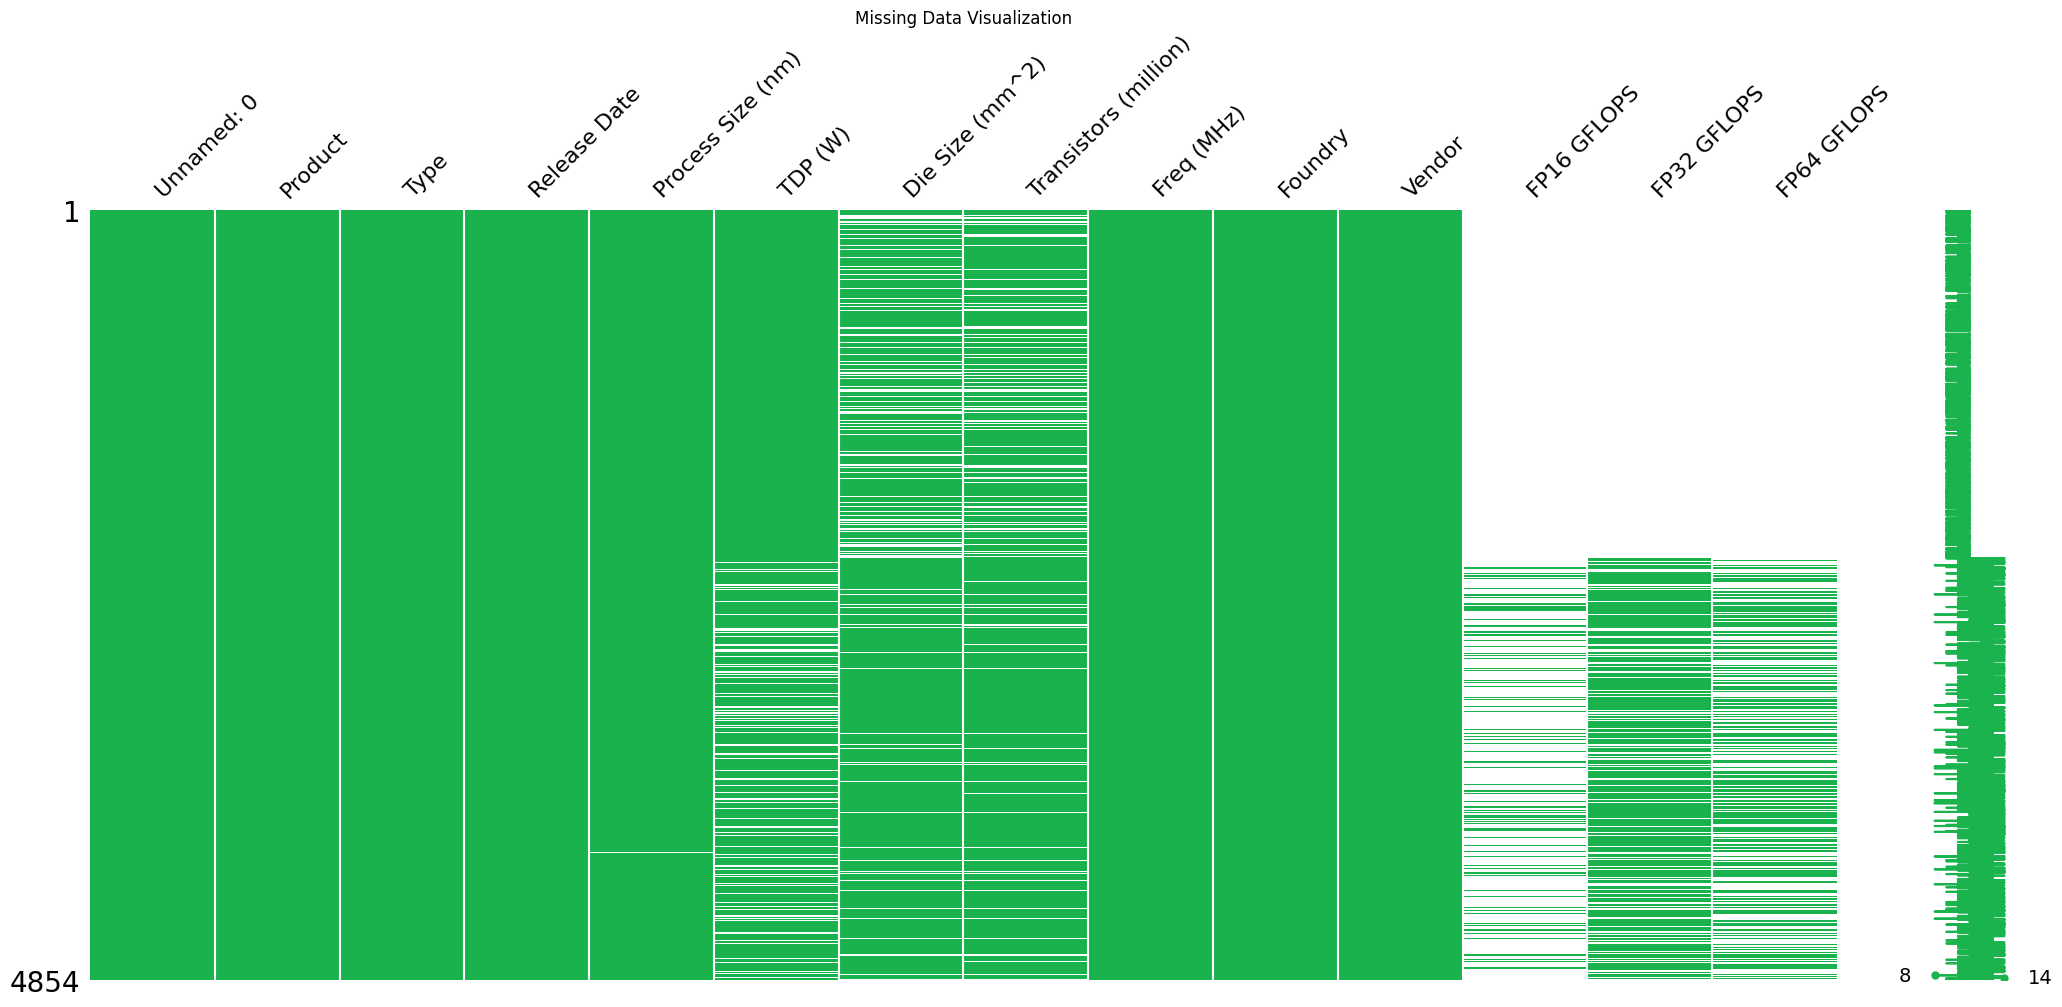

In [22]:
msno.matrix(df1, color=(0.1, 0.7, 0.3))
plt.title("Missing Data Visualization") 
plt.show()

. Data missing at random on columns TDP,Die size, Transistors, FP16,FP32 and and FP64  

. Process size has data missing completly at random

### 2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

In [24]:
num_cols = df1.select_dtypes('number').columns
imputer = KNNImputer(n_neighbors=5)

df1[num_cols] = imputer.fit_transform(df1[num_cols])

In [25]:
# drop columns with more tha 50% missingness "FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"

df1 = df1.drop(columns=["FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"])

### 3. Drop non-consequntial fields

In [27]:
# drop unnamed column

df1 = df1.drop(columns=["Unnamed: 0"])

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4854 non-null   object 
 1   Type                   4854 non-null   object 
 2   Release Date           4854 non-null   object 
 3   Process Size (nm)      4854 non-null   float64
 4   TDP (W)                4854 non-null   float64
 5   Die Size (mm^2)        4854 non-null   float64
 6   Transistors (million)  4854 non-null   float64
 7   Freq (MHz)             4854 non-null   float64
 8   Foundry                4854 non-null   object 
 9   Vendor                 4854 non-null   object 
dtypes: float64(5), object(5)
memory usage: 379.3+ KB


### 4. Transform temporal data to their corrrect format (date time)

In [38]:
df1["Release Date"] = pd.to_datetime(df1["Release Date"], errors = "coerce")

df1["Year"]= df1["Release Date"].dt.year.astype('Int64')

In [39]:
df1["Release Date"].dtype

df1.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Year
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,147.8,443.8,2600.0,Intel,Intel,2020
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4854 non-null   object        
 1   Type                   4854 non-null   object        
 2   Release Date           4779 non-null   datetime64[ns]
 3   Process Size (nm)      4854 non-null   float64       
 4   TDP (W)                4854 non-null   float64       
 5   Die Size (mm^2)        4854 non-null   float64       
 6   Transistors (million)  4854 non-null   float64       
 7   Freq (MHz)             4854 non-null   float64       
 8   Foundry                4854 non-null   object        
 9   Vendor                 4854 non-null   object        
 10  Year                   4779 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), float64(5), object(4)
memory usage: 422.0+ KB


### 5. Perfom a full EDA and demonstrate the validity of the following assumptions

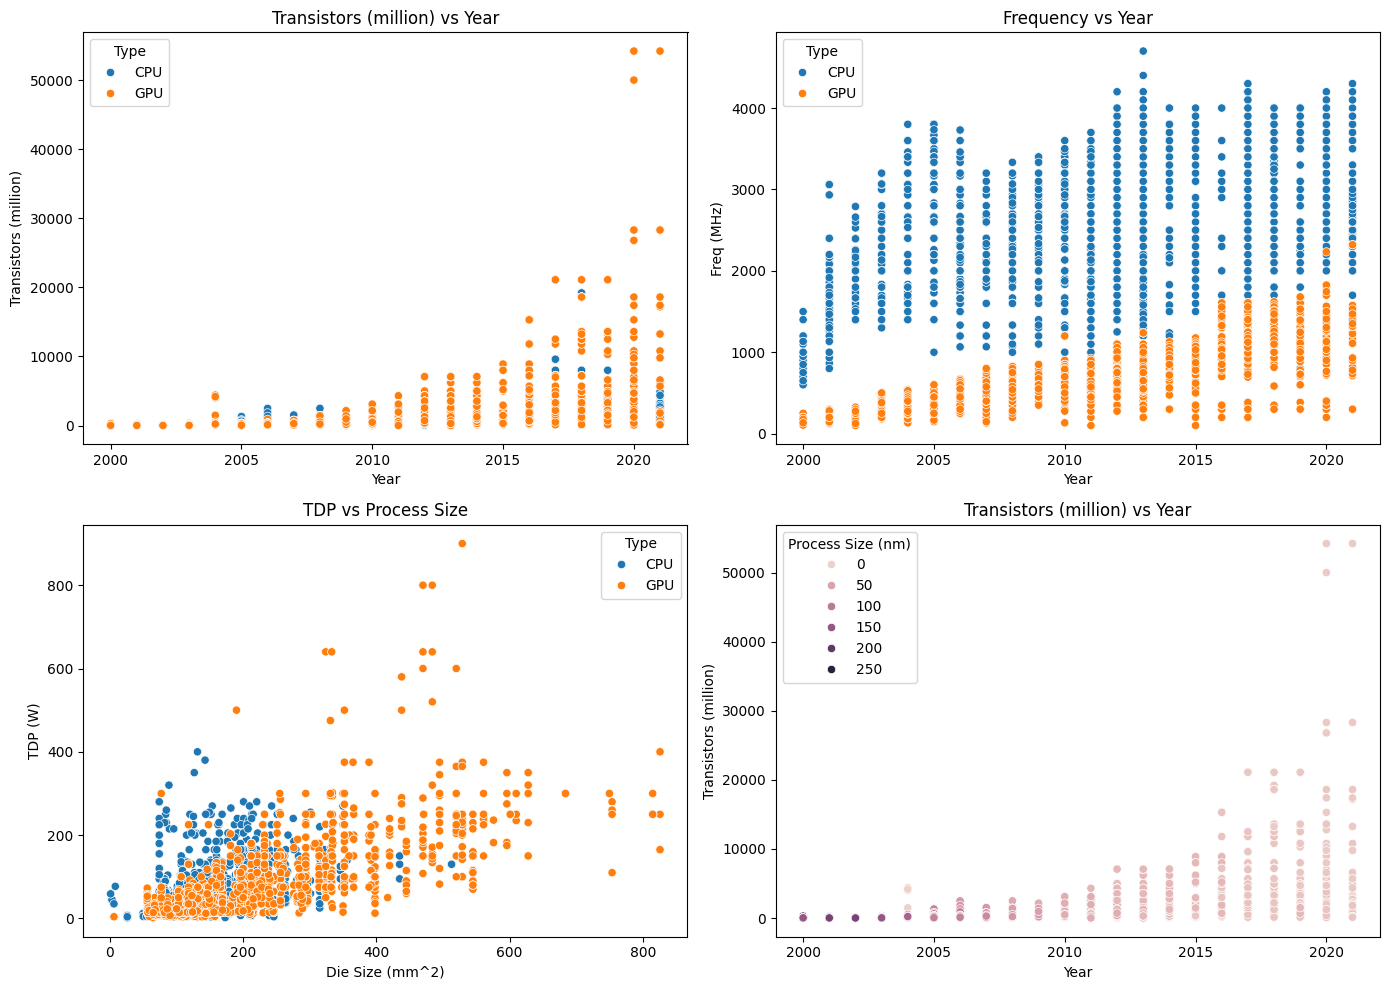

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))


sns.scatterplot(data=df1, x='Year', y='Transistors (million)', hue='Type', ax=axes[0,0])
axes[0,0].set_title('Transistors (million) vs Year')


sns.scatterplot(data=df1, x='Year', y='Freq (MHz)', hue='Type', ax=axes[0,1])
axes[0,1].set_title('Frequency vs Year')


sns.scatterplot(data=df1, x='Die Size (mm^2)', y='TDP (W)', hue='Type', ax=axes[1,0])
axes[1,0].set_title('TDP vs Process Size')


sns.scatterplot(data=df1, x='Year', y='Transistors (million)', hue='Process Size (nm)', ax=axes[1,1])
axes[1,1].set_title('Transistors (million) vs Year')


plt.tight_layout()
plt.show()

a. Moore's Law still holds, especially in GPUs.

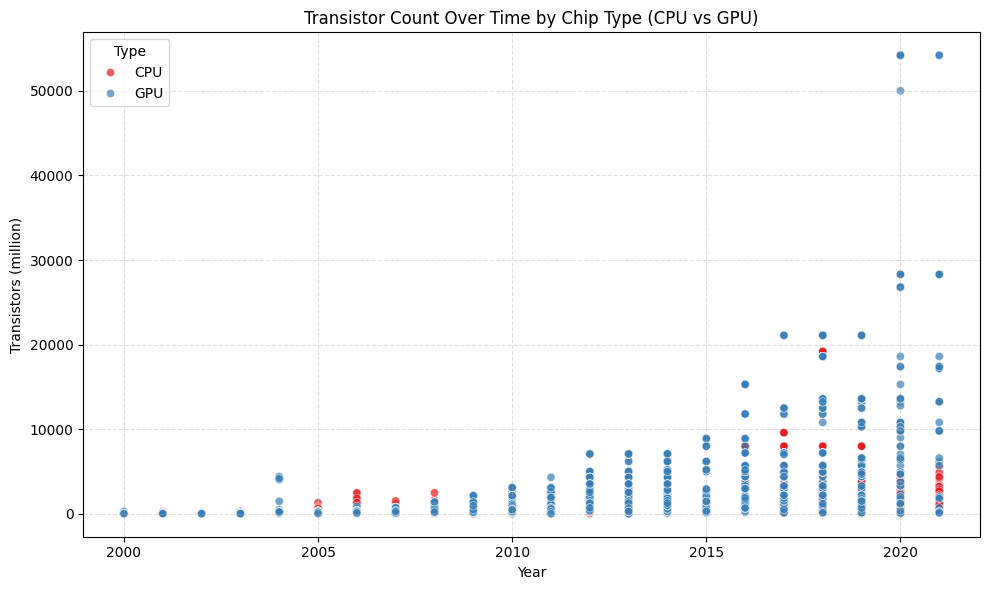

In [50]:
# Transitors VS Release Date BY Type

df1["Release Date"] = pd.to_datetime(df1["Release Date"], errors="coerce")
df1["Year"] = df1["Release Date"].dt.year

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df1,
    x="Year",
    y="Transistors (million)",
    hue="Type",
    palette="Set1",
    alpha=0.7
)

plt.title("Transistor Count Over Time by Chip Type (CPU vs GPU)")
plt.xlabel("Year")
plt.ylabel("Transistors (million)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#### option 2 used plotly which displays hover data

In [63]:
fig = px.scatter(
    df1,
    x="Year",
    y="Transistors (million)",
    color="Type",         
    hover_data=["Type", "Transistors (million)", "Release Date", "Freq (MHz)"],
    title="Transistor Count Over Time by Chip Type (CPU vs GPU)",
    log_y=True,             
    height=600,
    width=900
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Transistors (million)",
    legend_title="Chip Type"
)
fig.show()

#### b. Dannard Scaling is still valid in general.

In [68]:

fig = px.scatter(
    df1,
    x="Die Size (mm^2)",
    y="TDP (W)",
    color="Type",
    hover_data={
        "Product": True,
        "Release Date": True,
        "TDP (W)": True,
        "Freq (MHz)": True,
        "Die Size (mm^2)": True,
        "Type": False, 
    },
    title="TDP vs Die Size",
    size_max=12
)

fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(
    xaxis_title="Die Size (mm²)",
    yaxis_title="TDP (W)",
    legend_title="Chip Type"
)

fig.show()


### c. CPUs have higher frequencies, but GPUs are catching up.

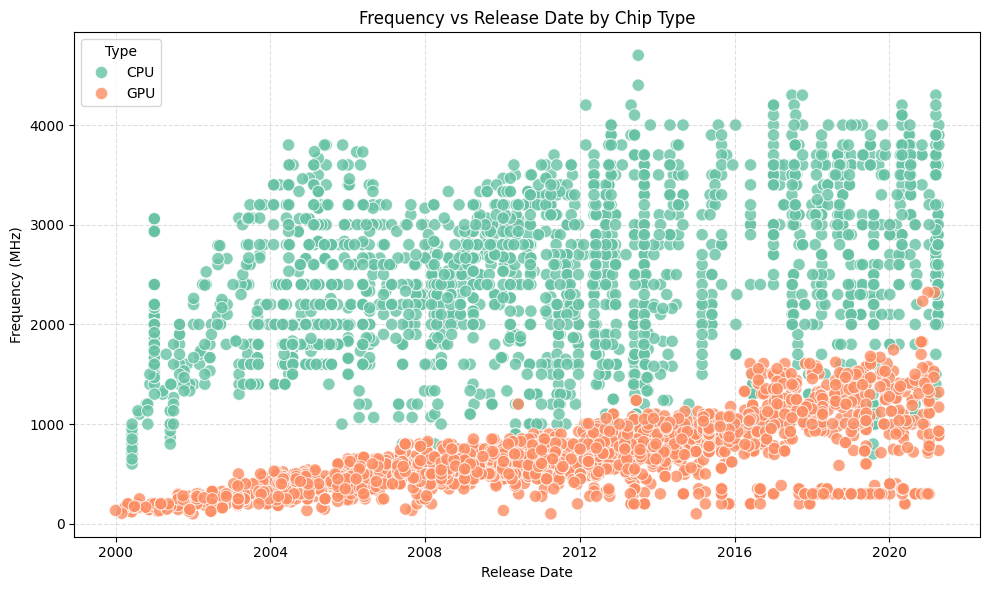

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df1,
    x="Release Date",
    y="Freq (MHz)",
    hue="Type",
    palette="Set2",
    s=80,
    alpha=0.8
)

plt.title("Frequency vs Release Date by Chip Type")
plt.xlabel("Release Date")
plt.ylabel("Frequency (MHz)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## 6 Calculate and visualized the correlation among the features

In [ ]:
#compute correlation matrix

numeric_cols = df1.select_dtypes(include='number')

corr = numeric_cols.corr()

In [87]:
#Include a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool))

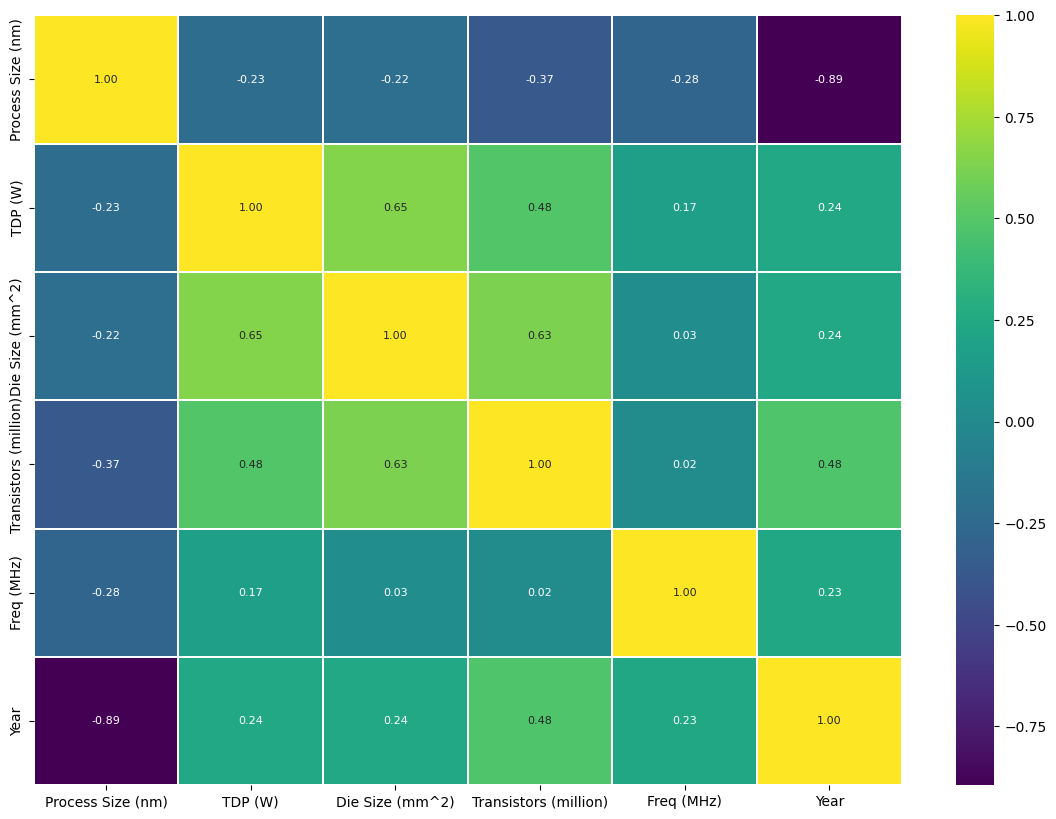

In [94]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    cmap='viridis',
    linewidths=0.3,
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.show()


There is corelation between; TDP, Die size and Transisters,

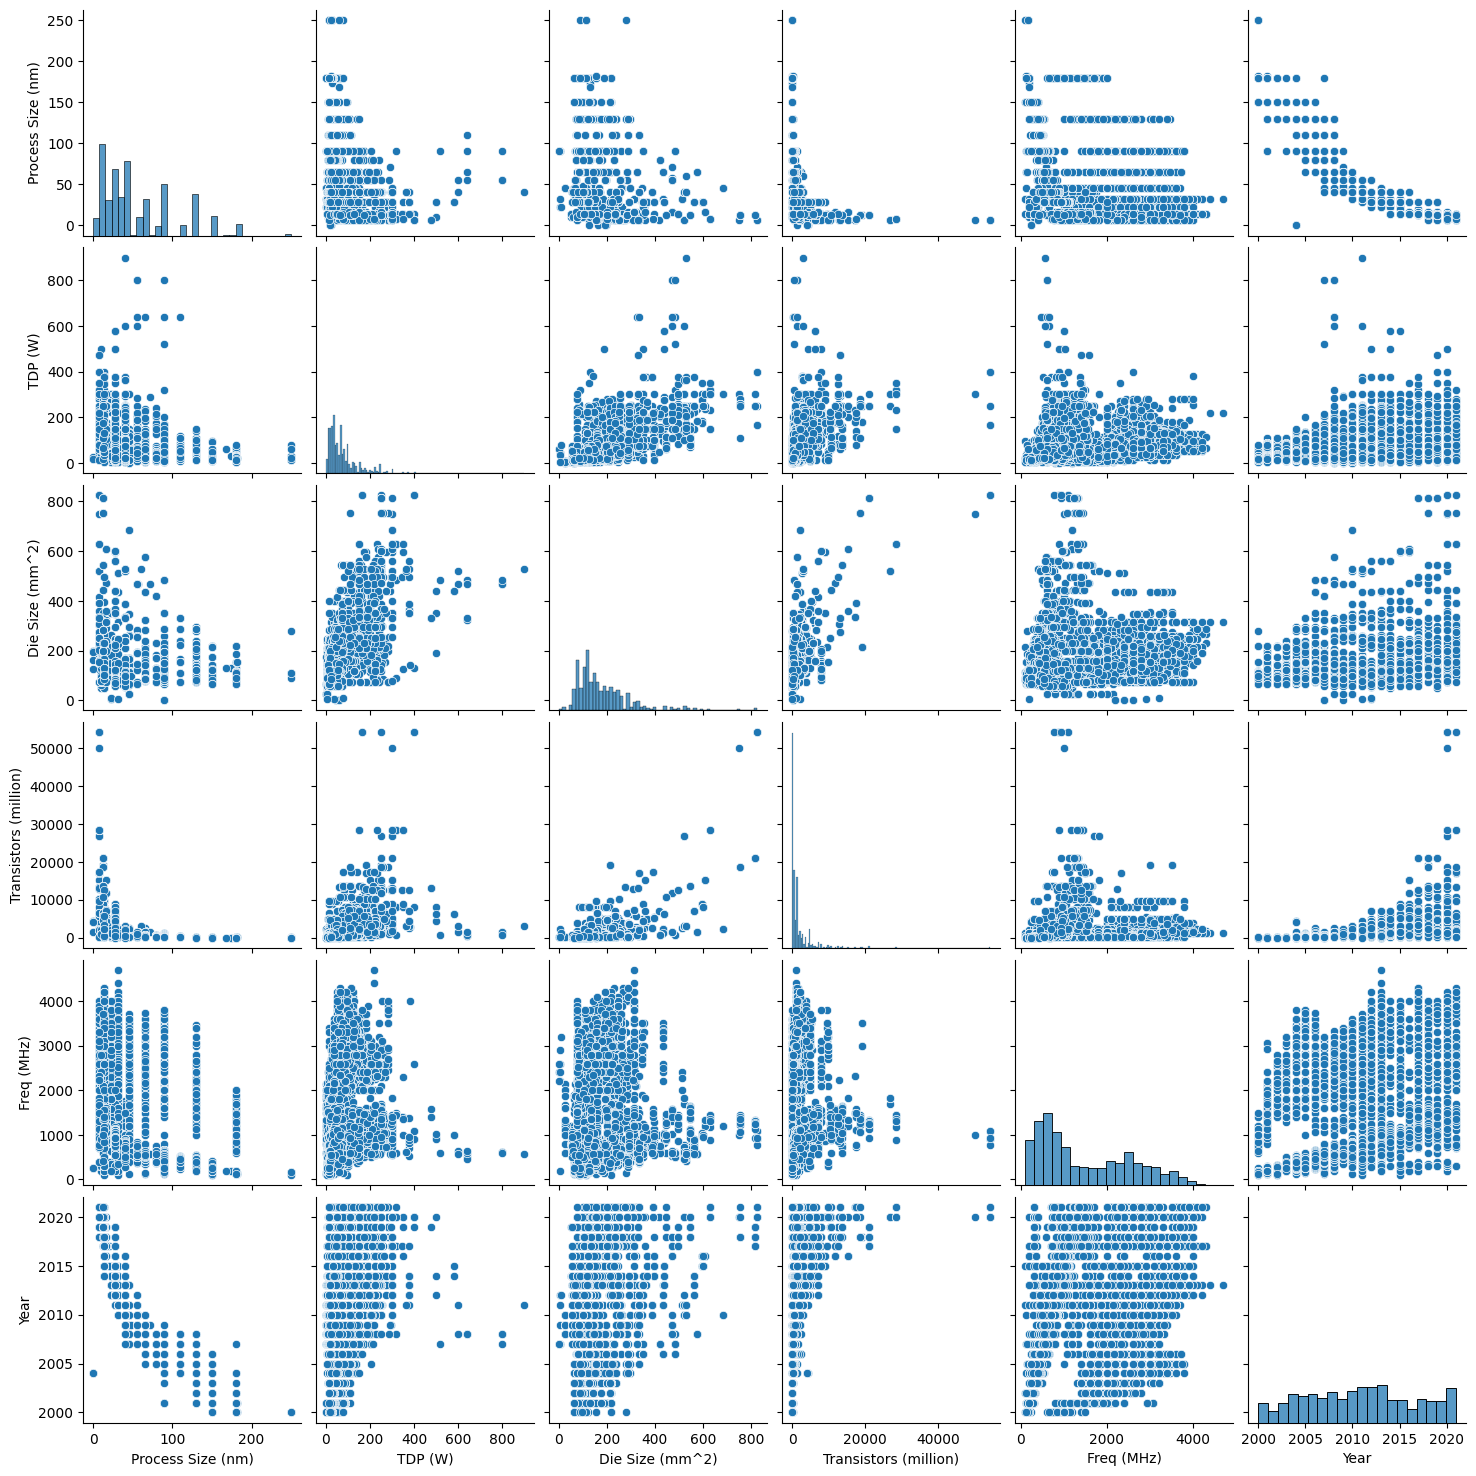

In [77]:
sns.pairplot(df1.select_dtypes(include='number'))
plt.show()

## 7. Perfom the correct encoding for your data, in readiness for modelling.

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4854 non-null   object        
 1   Type                   4854 non-null   object        
 2   Release Date           4779 non-null   datetime64[ns]
 3   Process Size (nm)      4854 non-null   float64       
 4   TDP (W)                4854 non-null   float64       
 5   Die Size (mm^2)        4854 non-null   float64       
 6   Transistors (million)  4854 non-null   float64       
 7   Freq (MHz)             4854 non-null   float64       
 8   Foundry                4854 non-null   object        
 9   Vendor                 4854 non-null   object        
 10  Year                   4779 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 417.3+ KB


In [ ]:
#drop non-usefull columns
df1 = df1.drop(columns=['Release Date'])

In [ ]:

df1 = df1.drop(columns=['Product'])

In [103]:
# 4. One-hot encode Type, Foundry, Vendor
df_encoded = pd.get_dummies(
    df1,
    columns=['Type', 'Foundry', 'Vendor'],
    drop_first=True   # prevents multicollinearity
)

In [104]:

print(df_encoded.info())
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      4854 non-null   float64
 1   TDP (W)                4854 non-null   float64
 2   Die Size (mm^2)        4854 non-null   float64
 3   Transistors (million)  4854 non-null   float64
 4   Freq (MHz)             4854 non-null   float64
 5   Year                   4779 non-null   float64
 6   Type_GPU               4854 non-null   bool   
 7   Foundry_IBM            4854 non-null   bool   
 8   Foundry_Intel          4854 non-null   bool   
 9   Foundry_NEC            4854 non-null   bool   
 10  Foundry_Renesas        4854 non-null   bool   
 11  Foundry_Samsung        4854 non-null   bool   
 12  Foundry_Sony           4854 non-null   bool   
 13  Foundry_TSMC           4854 non-null   bool   
 14  Foundry_UMC            4854 non-null   bool   
 15  Foun

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Year,Type_GPU,Foundry_IBM,Foundry_Intel,Foundry_NEC,Foundry_Renesas,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC,Foundry_Unknown,Vendor_ATI,Vendor_Intel,Vendor_NVIDIA,Vendor_Other
0,65.0,45.0,77.0,122.0,2200.0,2007.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,14.0,35.0,192.0,4800.0,3200.0,2018.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,10.0,28.0,147.8,443.8,2600.0,2020.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,22.0,80.0,160.0,1400.0,1800.0,2013.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,45.0,125.0,258.0,758.0,3700.0,2011.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
